In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
# reading the data

df = pd.read_csv('movies.csv')

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Checking for missing data 

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
#Findling the total percent of missing values
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())*100
    print('{} - {:.2f} %'.format(col,percent_missing))

name - 0.00 %
rating - 1.00 %
genre - 0.00 %
year - 0.00 %
released - 0.03 %
score - 0.04 %
votes - 0.04 %
director - 0.00 %
writer - 0.04 %
star - 0.01 %
country - 0.04 %
budget - 28.31 %
gross - 2.46 %
company - 0.22 %
runtime - 0.05 %


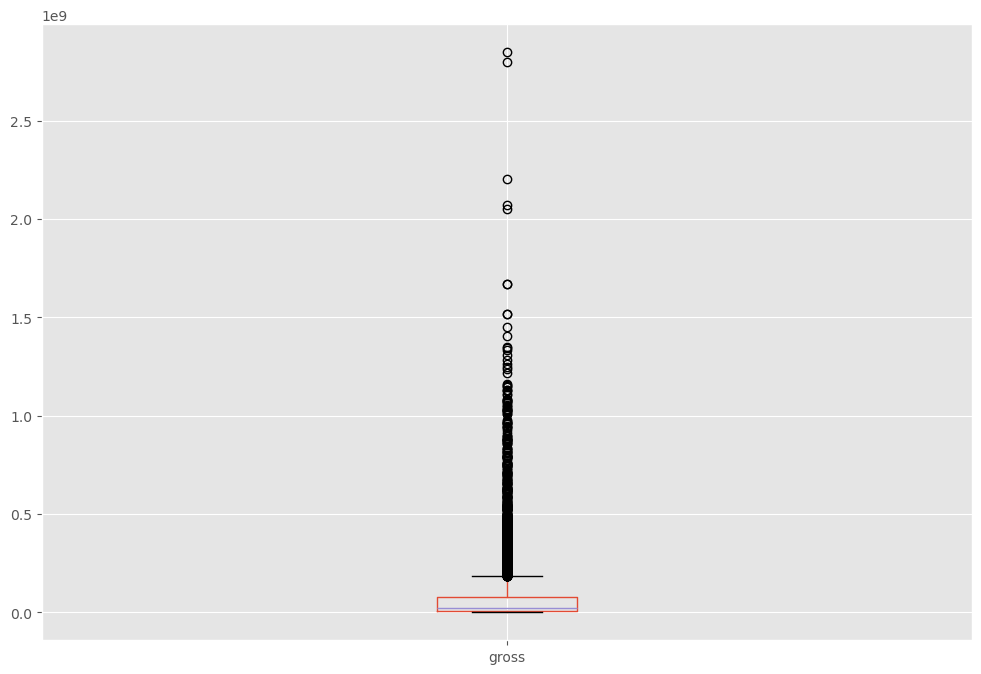

In [7]:
df.boxplot(column = ['gross'])
plt.show()

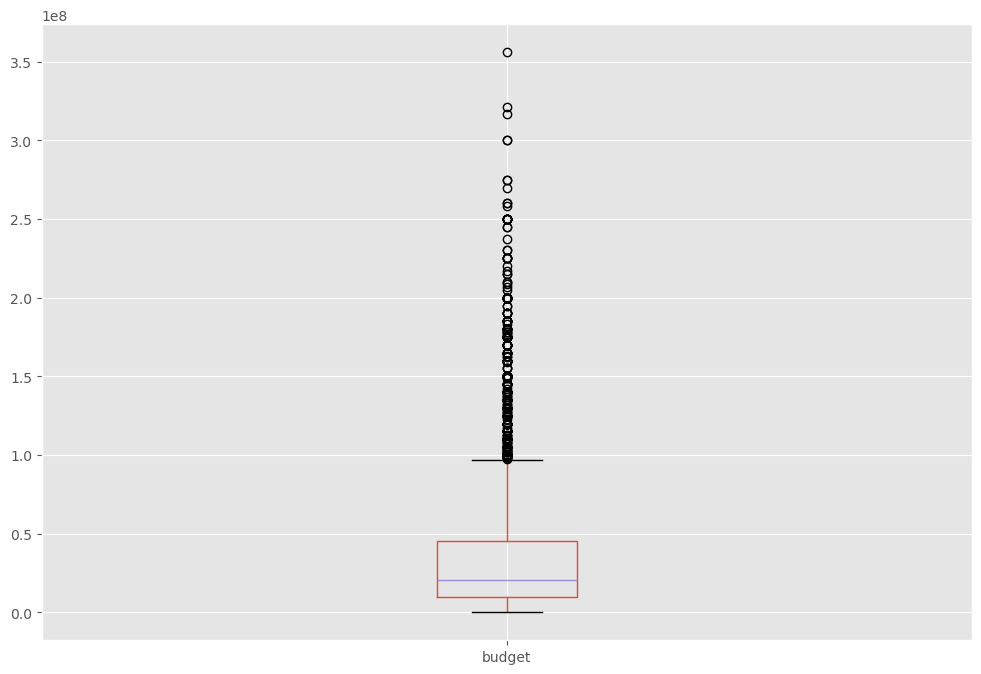

In [8]:
df.boxplot(column = ['budget'])
plt.show()

In [9]:
# as we can seen there is alot of outlier in both the column 

In [10]:
# dropping rows with missing gross since its only present in 2.5%

df = df.dropna(subset = ['gross'])

#for other missing value we can fill it 

df['budget'] = df['budget'].fillna(df['budget'].median())
df['score'] = df['score'].fillna(df['score'].median())
df['votes'] = df['votes'].fillna(df['votes'].median())
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

#filling categorical values with mode 

df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['writer'] = df['writer'].fillna(df['writer'].mode()[0])
df['star'] = df['star'].fillna(df['star'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['company'] = df['company'].fillna(df['company'].mode()[0])

In [11]:

#checking if there are any more missing values

df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [12]:
#data description
df.describe()

,year,score,votes,budget,gross,runtime
count,7479.000000,7479.000000,7.479000e+03,7.479000e+03,7.479000e+03,7479.000000
mean,2000.657708,6.398757,9.014732e+04,3.185793e+07,7.850054e+07,107.442439
std,11.054811,0.962966,1.648068e+05,3.604056e+07,1.657251e+08,18.512087
min,1980.000000,1.900000,3.400000e+01,6.000000e+03,3.090000e+02,63.000000
25%,1991.000000,5.800000,9.900000e+03,1.400000e+07,4.532056e+06,95.000000
50%,2001.000000,6.500000,3.400000e+04,2.100000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.600000e+04,3.300000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [14]:
#getting the data type of column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
# Changing the datatype of the column for more easy analysis
df['budget'] = df['budget'].astype(dtype = int)
df['gross'] = df['gross'].astype(dtype= int)
df['votes'] = df['votes'].astype(dtype= int)
df['runtime'] = df['runtime'].astype(dtype= int)

In [16]:
#checking the datatype again 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int32
director     object
writer       object
star         object
country      object
budget        int32
gross         int32
company      object
runtime       int32
dtype: object

In [17]:
df['released'] = df['released'].astype(str)
df['released_year'] = df['released'].str.extract(r'(\d{4})')
df['released_year'].head()

0    1980
1    1980
2    1980
3    1980
4    1980
Name: released_year, dtype: object

In [18]:
df = df.sort_values(by='gross', ascending=False)


In [19]:
pd.set_option('display.max_rows', None)

In [20]:
# dropping duplicates values

df = df.drop_duplicates()


In [21]:
# Deep analysis of the data

# Knowing No of  movies per year

year = df['released_year'].value_counts().sort_index()
year.head()

released_year
1980     74
1981     91
1982    122
1983    129
1984    153
Name: count, dtype: int64

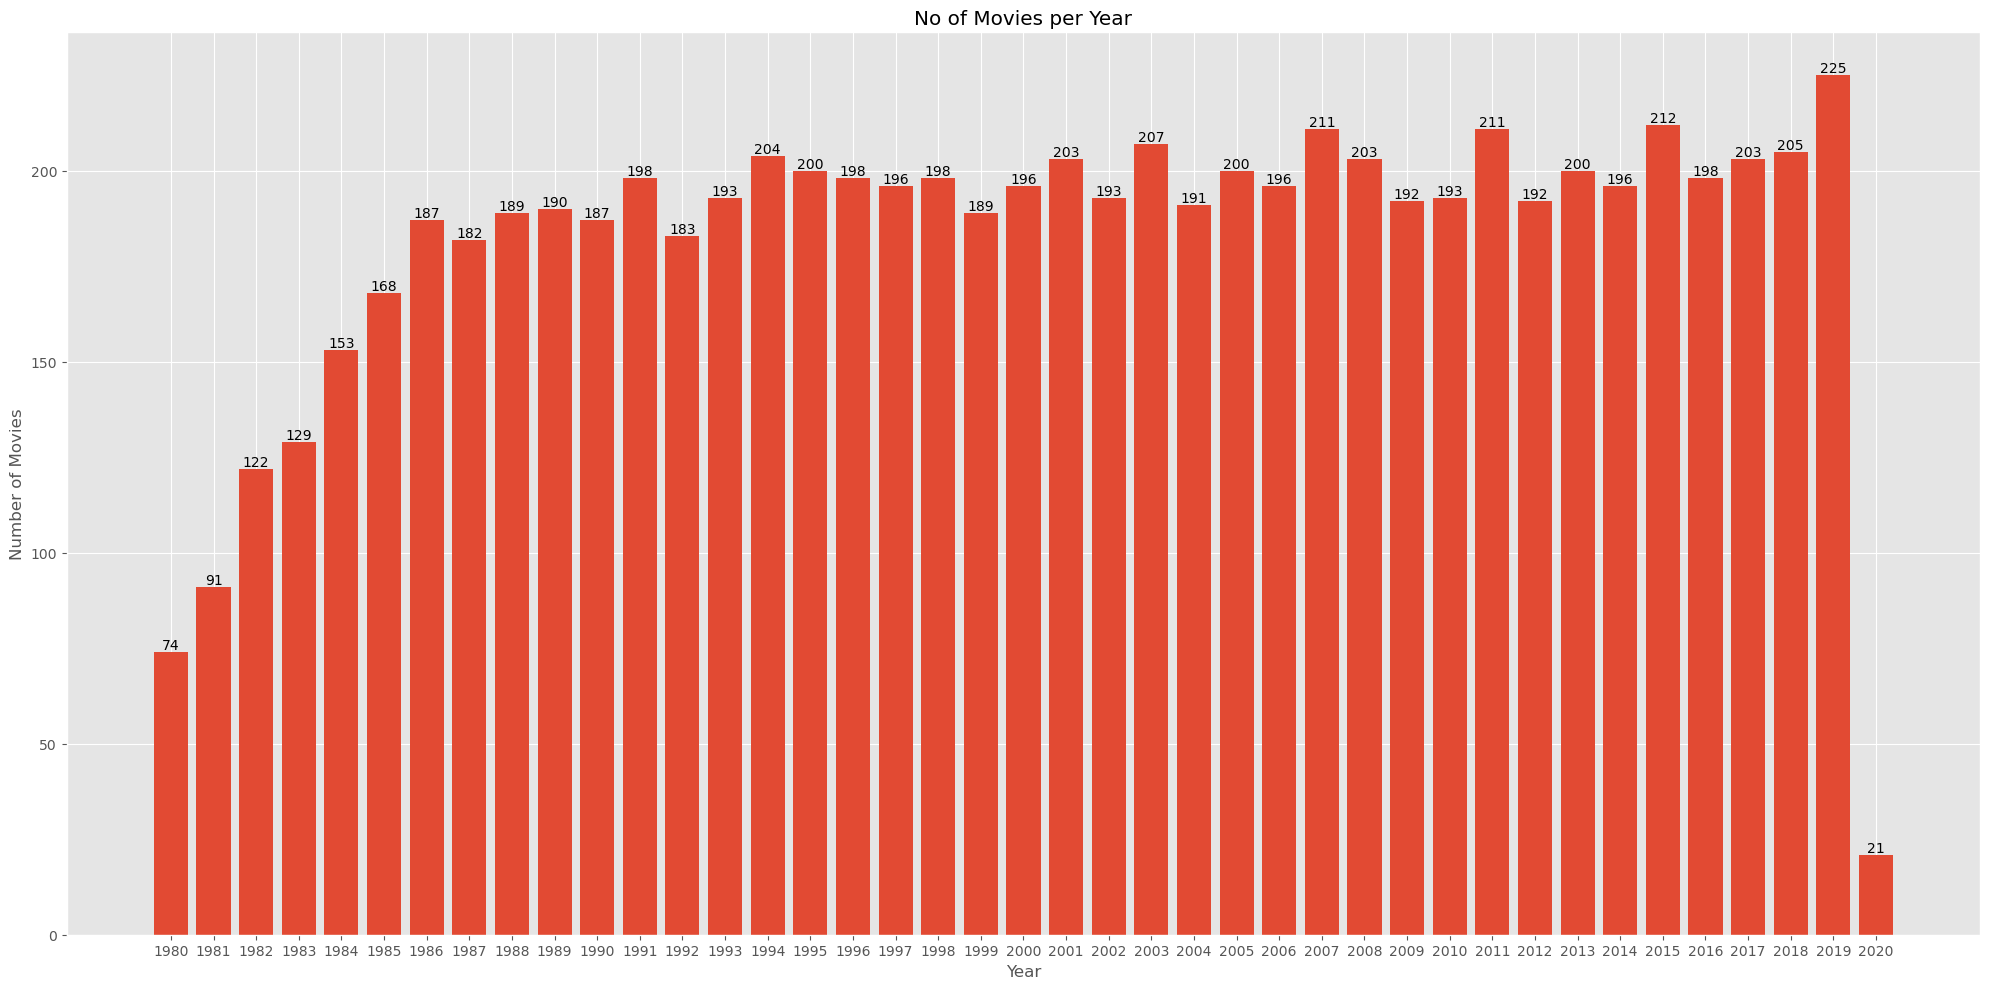

In [22]:
#Data
fig, ax = plt.subplots(figsize = (20,10))
x = year.index
y = year.values
bars = ax.bar(x, y)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Movies")
ax.set_title('No of Movies per Year')

ax.bar_label(bars) 
plt.tight_layout()
plt.show()



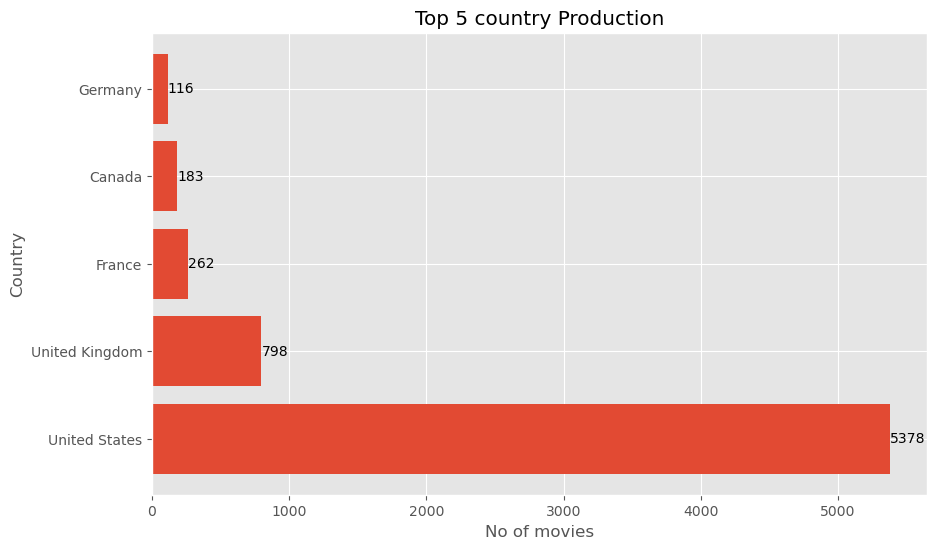

In [23]:
# No of movies per country

country = df['country'].value_counts().sort_values(ascending=False).head(5)

y= country.index
x= country.values

plt.figure(figsize = (10,6))

bars = plt.barh(y,x)
plt.xlabel('No of movies')
plt.ylabel('Country')
plt.title('Top 5 country Production')
plt.bar_label(bars)
plt.show()

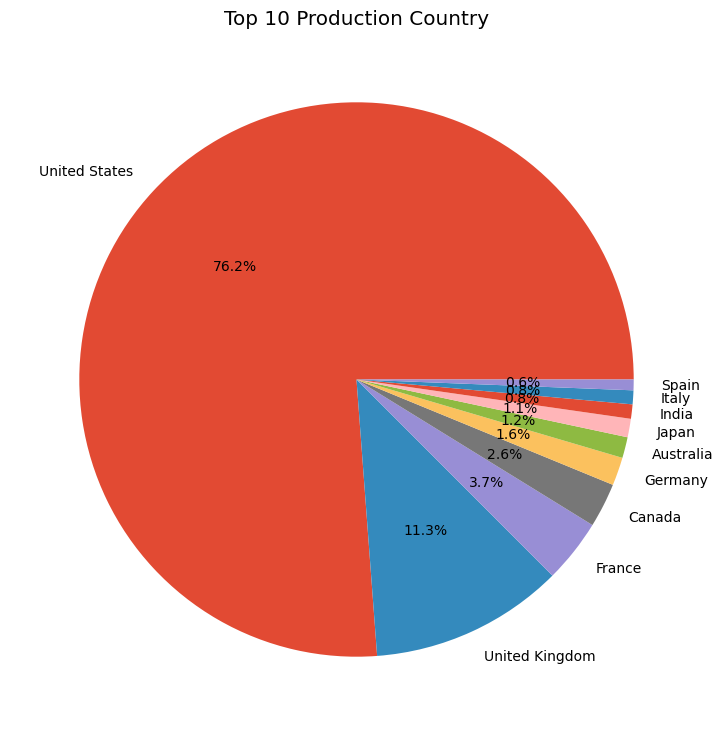

In [24]:
# Creating pie chart
country = df['country'].value_counts().sort_values(ascending=False).head(10)

labels = country.index
values = country.values

plt.figure(figsize = (15,9))

plt.pie(values, labels = labels, autopct = '%1.1f%%')
plt.title('Top 10 Production Country')
plt.show()

In [25]:
# Creating analysis for stars

star = df['star'].value_counts().sort_values(ascending = False).head(10)
star

star
Nicolas Cage          43
Tom Hanks             41
Robert De Niro        41
Denzel Washington     37
Tom Cruise            34
Bruce Willis          34
Johnny Depp           33
Sylvester Stallone    32
John Travolta         30
Mel Gibson            29
Name: count, dtype: int64

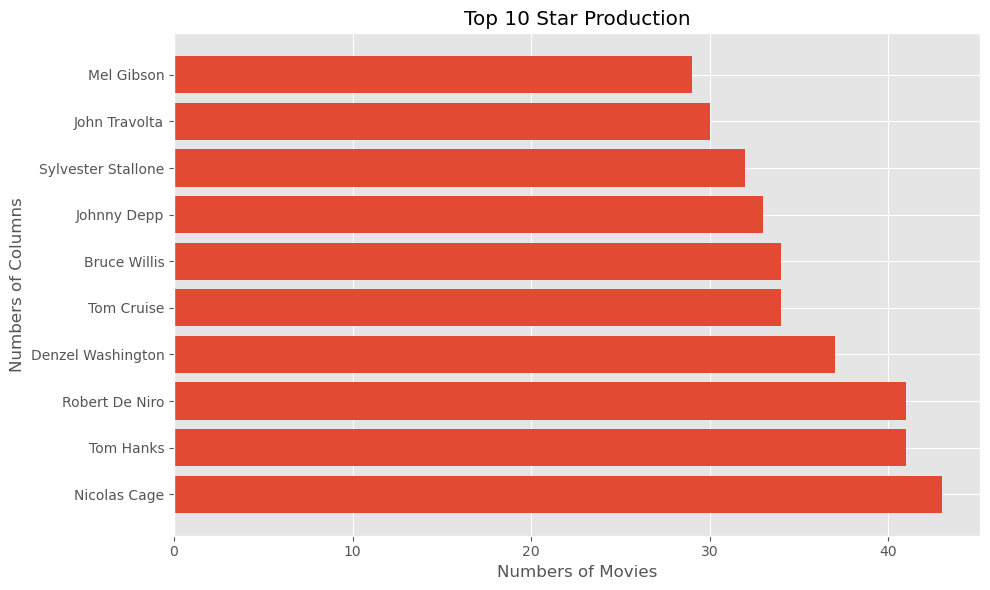

In [26]:
y = star.index
x = star.values

plt.figure(figsize = (10,6))

bar = plt.barh(y,x)
plt.xlabel('Numbers of Movies')
plt.ylabel('Numbers of Columns')
plt.title('Top 10 Star Production')

plt.tight_layout()
plt.show()

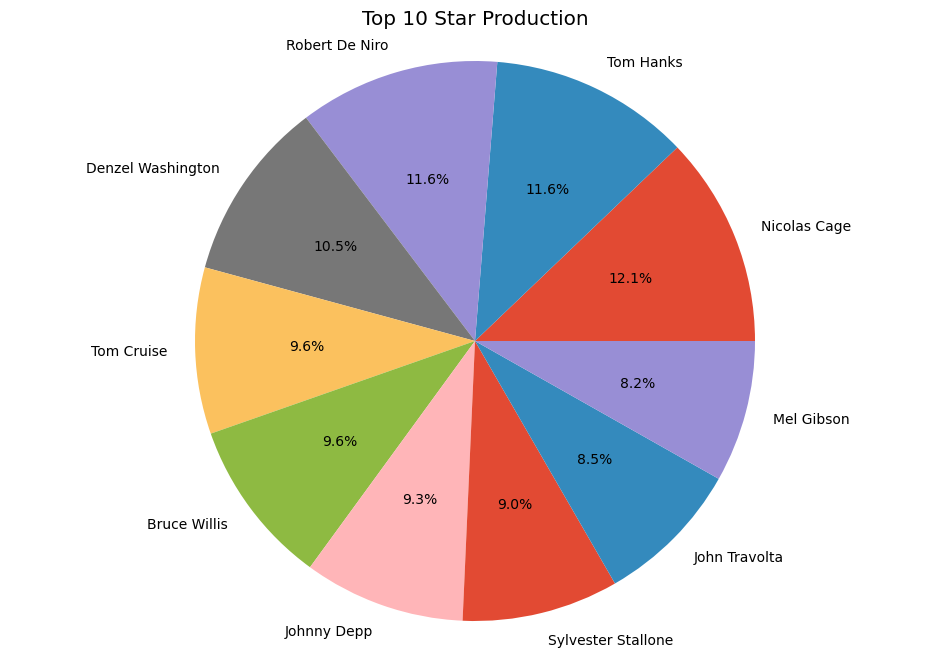

In [27]:
#Creating the pie chart for the same

label = star.index
values = star.values

plt.pie(values, labels=label,autopct = '%1.1f%%' )
plt.axis('equal')
plt.title('Top 10 Star Production')
plt.show()

In [28]:
movie_score = df.nlargest(10,'score')
movie_score[['name','score']]


,name,score
2443,The Shawshank Redemption,9.3
5243,The Dark Knight,9.0
4245,The Lord of the Rings: The Return of the King,8.9
2247,Schindler's List,8.9
2444,Pulp Fiction,8.9
3845,The Lord of the Rings: The Fellowship of the Ring,8.8
5643,Inception,8.8
2445,Forrest Gump,8.8
3444,Fight Club,8.8
4048,The Lord of the Rings: The Two Towers,8.7


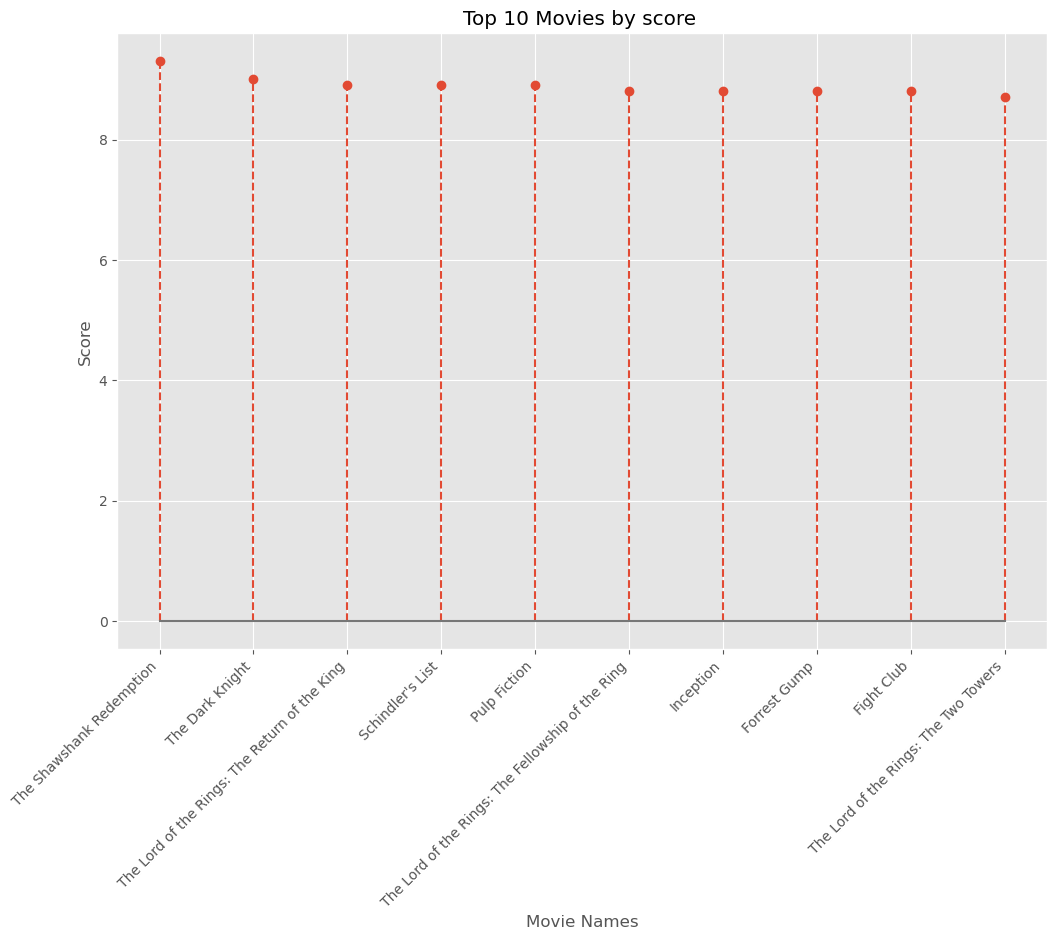

In [29]:
# creating Lollipop Chart


x1 = movie_score['name']
y1 = movie_score['score']
plt.stem(x1, y1,linefmt = '--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Movie Names')
plt.ylabel('Score')
plt.title('Top 10 Movies by score ')
plt.show()

In [30]:
CompanyGross = df.groupby(['company'])[["gross"]].sum()

top15 = CompanyGross.sort_values(['gross','company'], ascending = False).head(15)
top15 = top15['gross'].astype('int64') 
top15.head(15)

company
Warner Bros.                 56491421806
Universal Pictures           52559667069
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Walt Disney Pictures         36327887792
Twentieth Century Fox        30913193094
New Line Cinema              19883797684
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Marvel Studios               10120607435
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

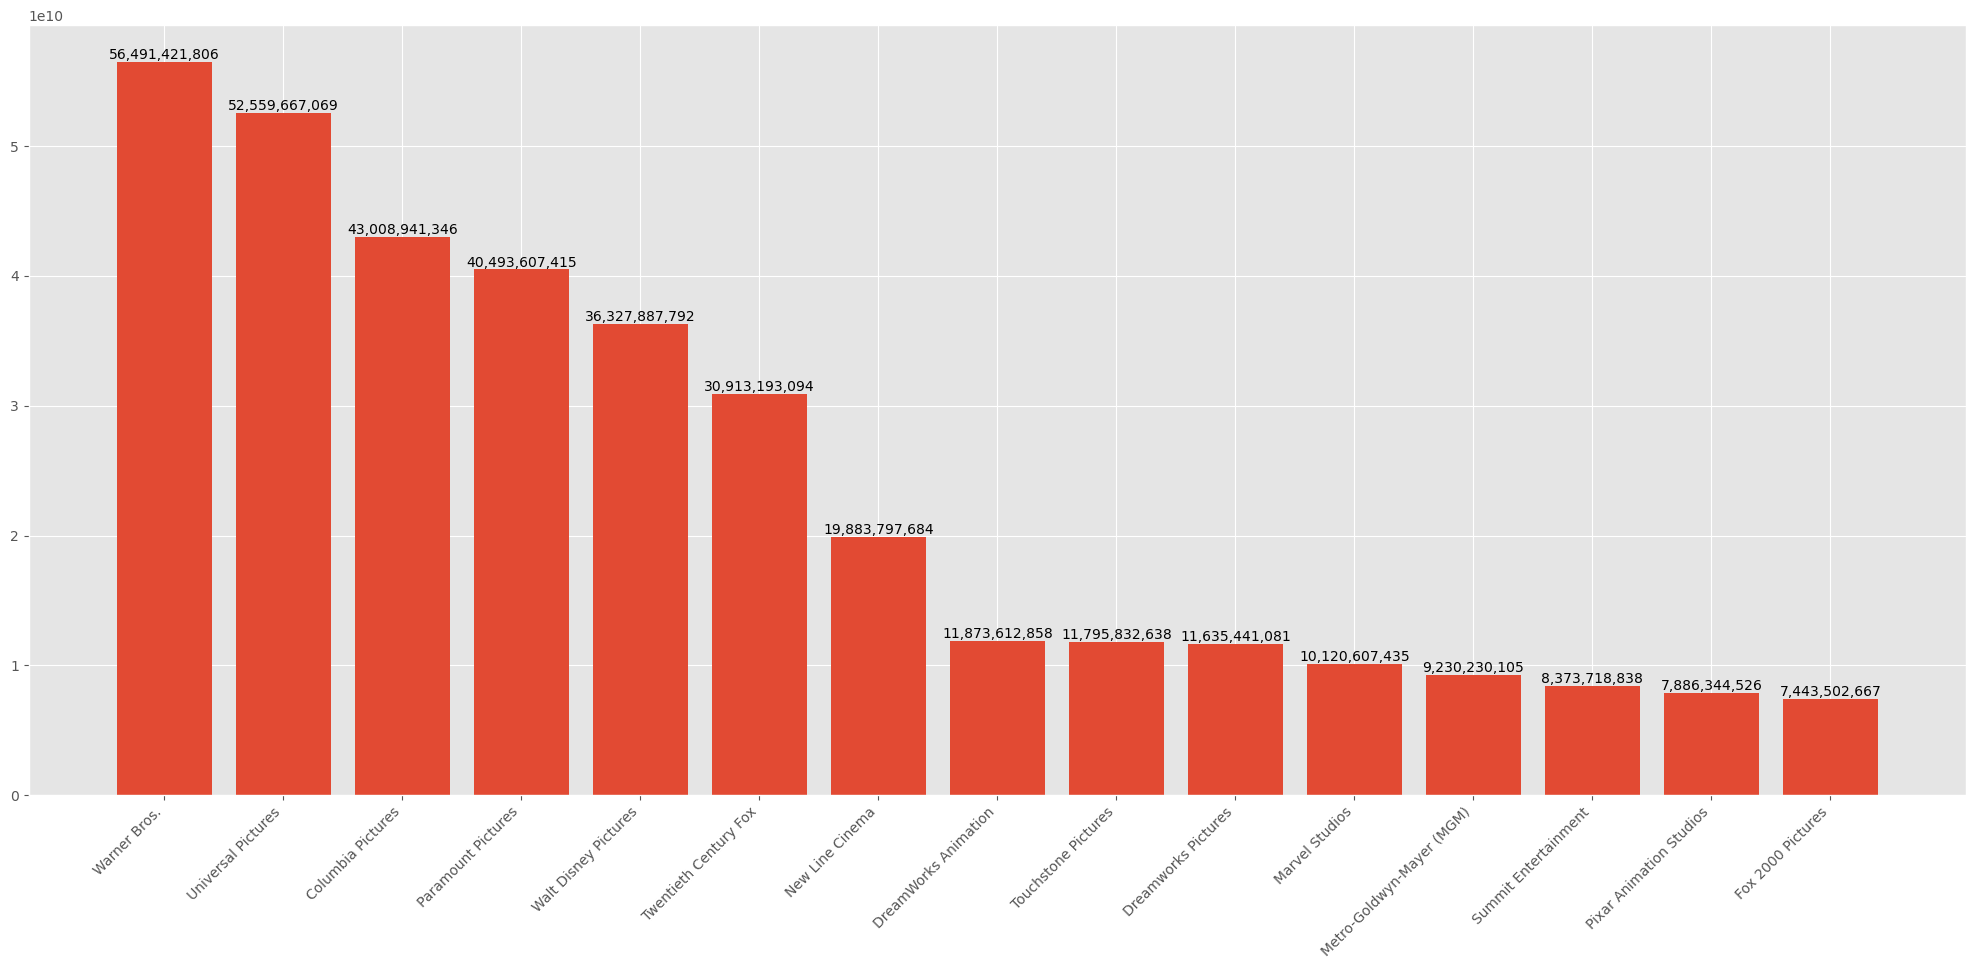

In [31]:
x = top15.index
y = top15.values

plt.figure(figsize =(25,10))
bars = plt.bar(x, y)
plt.bar_label(bars, labels=[f'{val:,.0f}' for val in y])
plt.xticks(rotation=45, ha = 'right' )
plt.show()

In [32]:
# Top 7 director

directors = df['director'].value_counts().sort_values(ascending = False).head(7)
directors

director
Woody Allen          38
Clint Eastwood       31
Steven Spielberg     27
Directors            27
Ron Howard           24
Steven Soderbergh    23
Ridley Scott         23
Name: count, dtype: int64

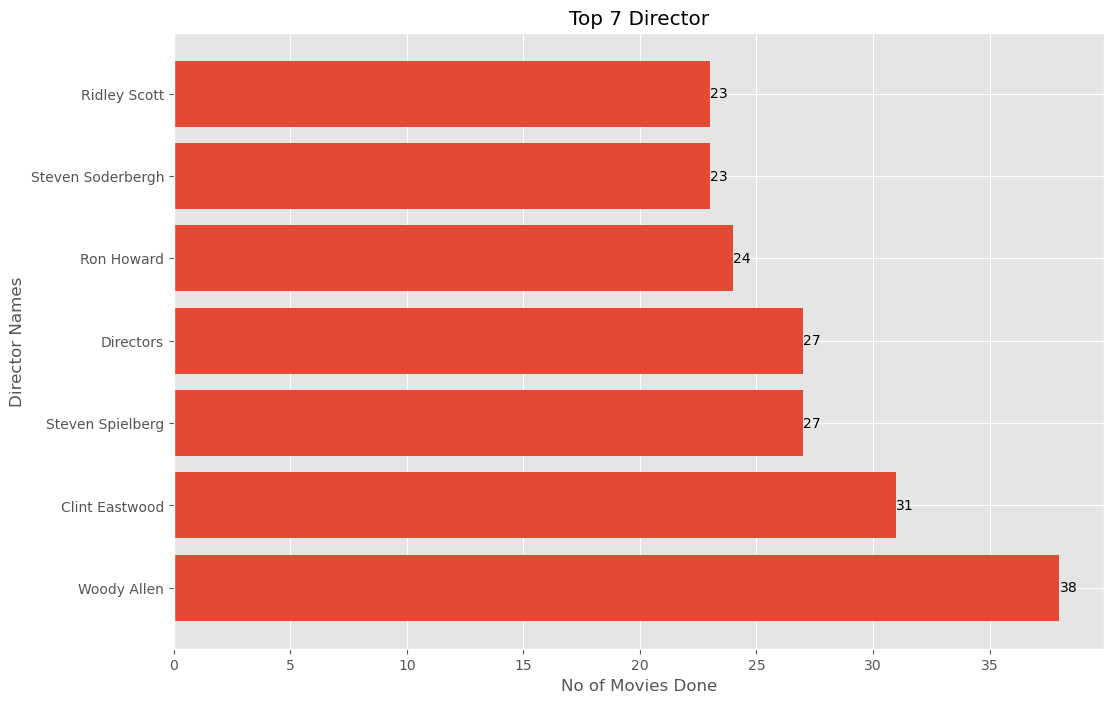

In [33]:
x = directors.values
y = directors.index

bars = plt.barh(y,x)
plt.bar_label(bars)
plt.xlabel("No of Movies Done")
plt.ylabel("Director Names")
plt.title("Top 7 Director")
plt.show()

In [34]:
top_directors = df.groupby('director')['gross'].mean().sort_values(ascending = False).head(8)
top_directors

director
Kyle Balda          1.097122e+09
Josh Cooley         1.073395e+09
Chris Buck          1.059909e+09
Lee Unkrich         9.373943e+08
David Yates         8.602274e+08
George Lucas        8.497511e+08
J.J. Abrams         7.765626e+08
Robert Stromberg    7.584118e+08
Name: gross, dtype: float64

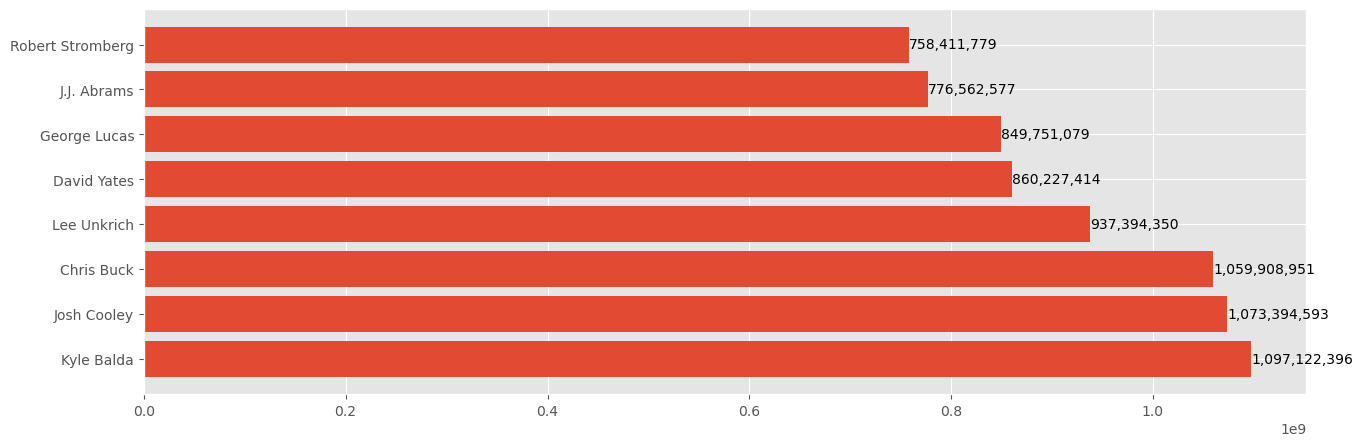

In [35]:
x = top_directors.values
y = top_directors.index
plt.figure(figsize = (15,5))
bars = plt.barh(y,x)
plt.bar_label(bars, labels=[f'{val:,.0f}' for val in x])

plt.show()

C:\Users\Swati\AppData\Local\Temp\ipykernel_9276\2441105244.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x = top_genre.values, y = top_genre.index, palette='rocket' )


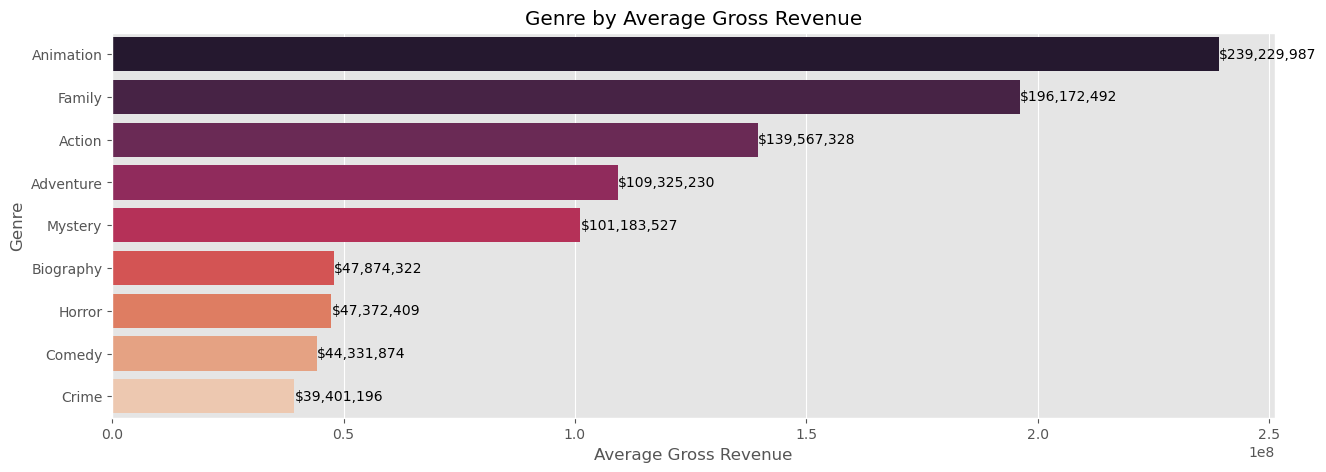

In [36]:
# Top-9 genre and their average movie Gross Revenue

top_genre = df.groupby('genre')['gross'].mean().sort_values(ascending = False).head(9)
top_genre
    
plt.figure(figsize = (15,5))
bars = sns.barplot(x = top_genre.values, y = top_genre.index, palette='rocket' )
for i, value in enumerate(top_genre.values):
    plt.text(value, i, f'${int(value):,}', va='center')
plt.xlabel('Average Gross Revenue')
plt.ylabel('Genre')
plt.title('Genre by Average Gross Revenue')

plt.show()

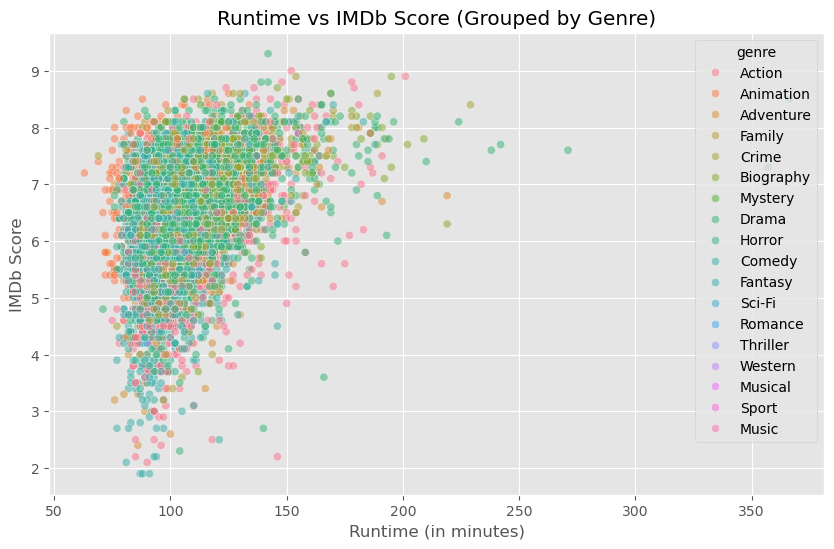

In [37]:
# Runtime vs IMDb Score( Grouped by genre)

plt.figure(figsize = (10,6))

sns.scatterplot(x = 'runtime', y = 'score', hue = 'genre', data = df, alpha = 0.5)
plt.title('Runtime vs IMDb Score (Grouped by Genre)')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('IMDb Score')
plt.show()



In [38]:
#Creating correlations

#Budget may have high correlation
#Company may have high correlation




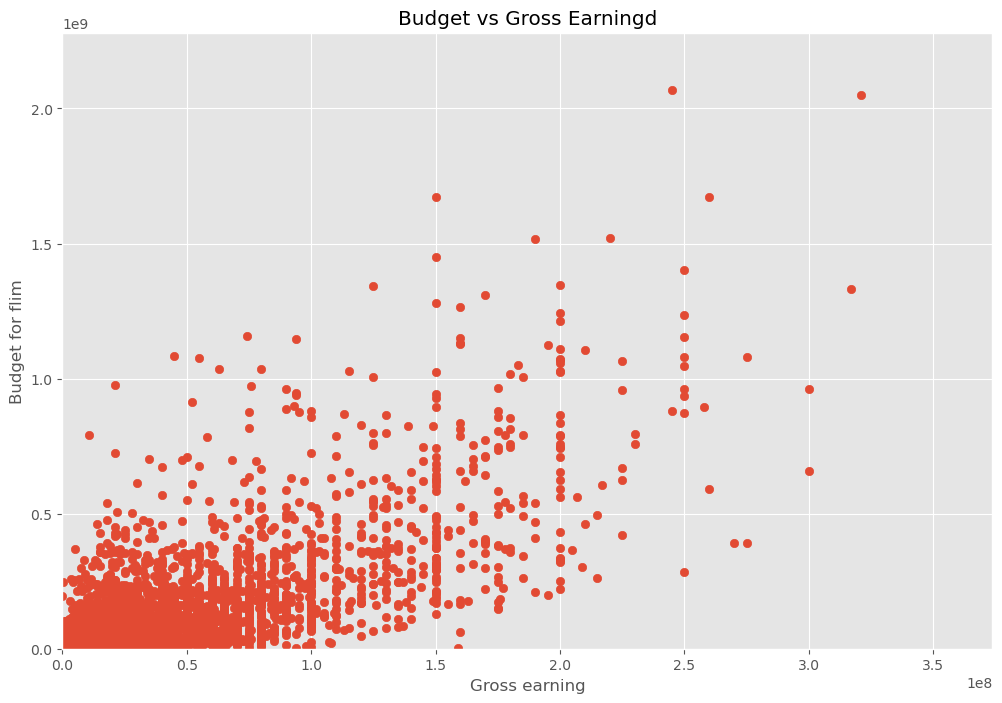

In [39]:
#Scatter plot with budget vs Gross

plt.scatter(x = df['budget'] ,y = df['gross'])
plt.title('Budget vs Gross Earningd')
plt.xlabel("Gross earning")
plt.ylabel('Budget for flim')
plt.xlim(0)
plt.ylim(0)
plt.show()

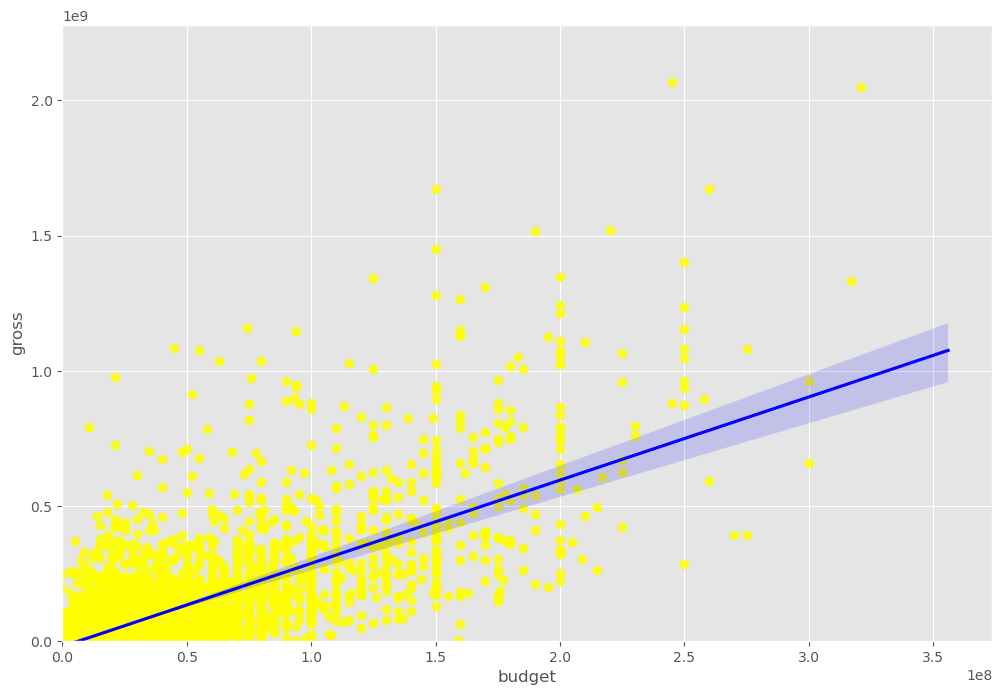

In [40]:
#Plotting budget vs seaborn using regplot
sns.regplot(x  = 'budget', y = 'gross', data = df, scatter_kws ={'color':"yellow"}, line_kws = {'color':'blue'})
plt.xlim(0)
plt.ylim(0)
plt.show()

In [41]:
#Correlation 

In [42]:
#works with numeric only
df.corr(numeric_only = True) #pearson, #kendall, #spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.091821,0.215740,0.288977,0.251902,0.114672
score,0.091821,1.000000,0.413096,0.058253,0.168951,0.397314
votes,0.215740,0.413096,1.000000,0.457389,0.571495,0.309541
budget,0.288977,0.058253,0.457389,1.000000,0.677572,0.272884
gross,0.251902,0.168951,0.571495,0.677572,1.000000,0.203435
runtime,0.114672,0.397314,0.309541,0.272884,0.203435,1.000000


In [43]:
# High correlation between budget and gross


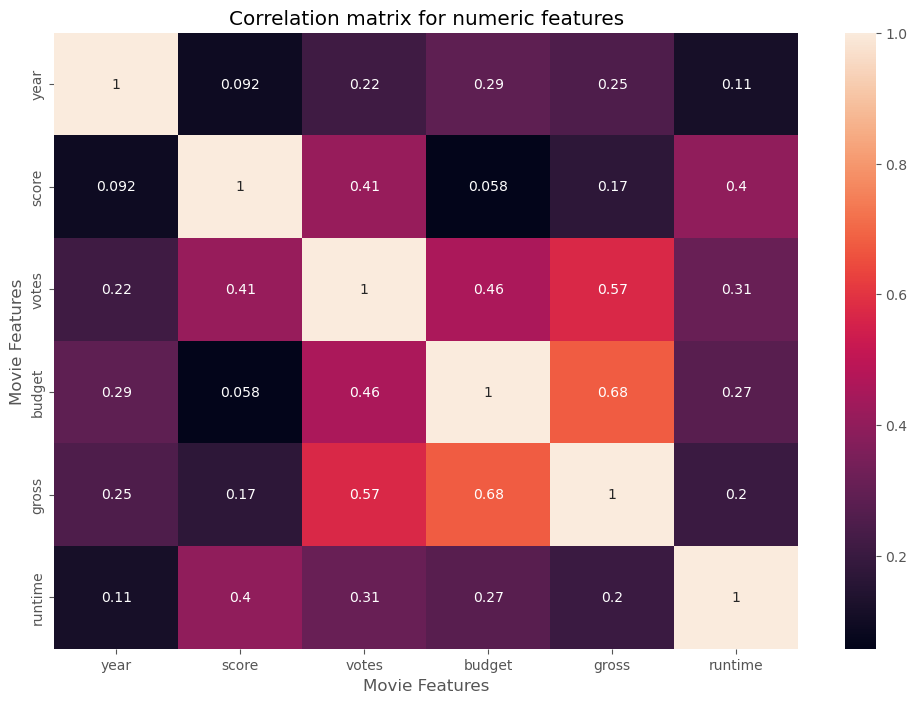

In [44]:
correlation_matrix = df.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix for numeric features')
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')
plt.show()

In [45]:
# now working with company (Company was not numeric)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,2012


In [51]:
df_numerized = df
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object' or df_numerized[col_name].dtype.name == 'category':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
6663,5008,5,0,2015,685,7.8,876000,1086,2468,504,53,245000000,2069521700,1470,138,35
7244,522,5,0,2018,188,8.4,897000,161,717,2141,53,321000000,2048359754,1532,149,38
7480,6040,4,2,2019,1456,6.9,222000,1412,1855,645,53,260000000,1670727580,2210,118,39
6653,2894,5,0,2015,1668,7.0,593000,503,3459,420,53,150000000,1670516444,2175,124,35
6043,5356,5,0,2012,2419,8.0,1300000,1473,2242,2141,53,220000000,1518815515,1532,143,32


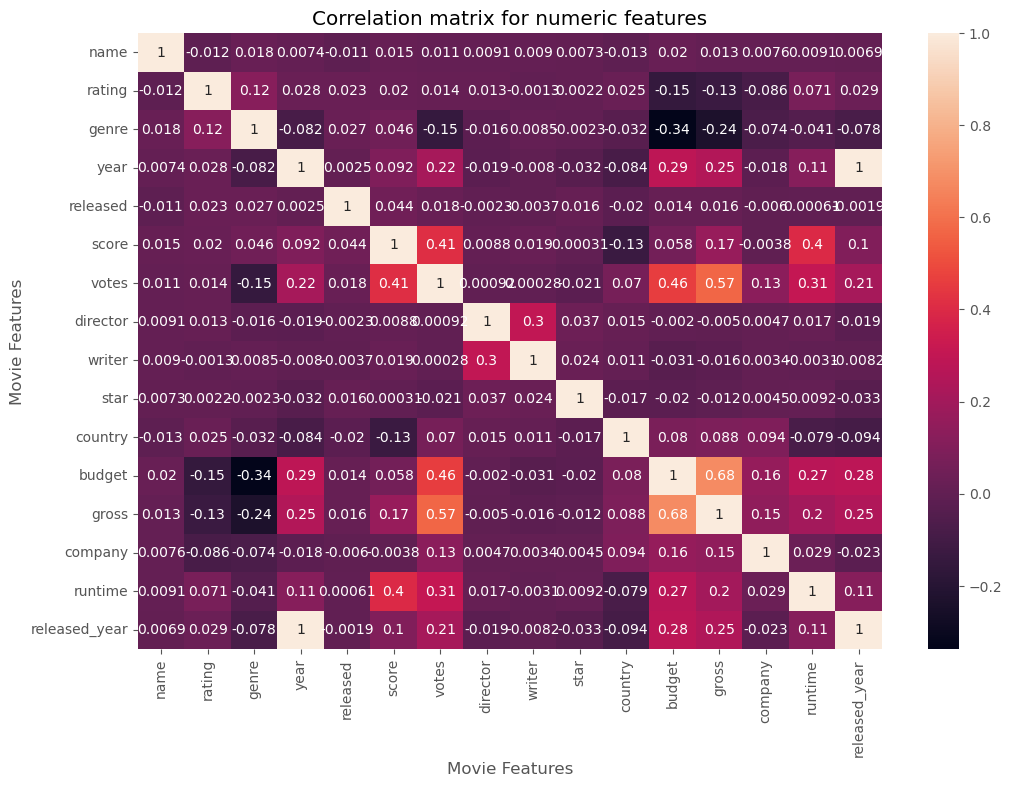

In [47]:
correlation_matrix = df_numerized.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix for numeric features')
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')
plt.show()

In [48]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
name,1.000000,-0.011779,0.017885,0.007404,-0.011033,0.015473,0.011429,0.009092,0.008964,0.007278,-0.012640,0.020096,0.012559,0.007556,0.009138,0.006891
rating,-0.011779,1.000000,0.120856,0.027984,0.023047,0.020423,0.013574,0.012939,-0.001283,0.002181,0.024890,-0.150301,-0.132019,-0.085508,0.070763,0.028682
genre,0.017885,0.120856,1.000000,-0.082252,0.026804,0.046093,-0.149289,-0.016412,0.008465,-0.002322,-0.032234,-0.337453,-0.238171,-0.073803,-0.040984,-0.077869
year,0.007404,0.027984,-0.082252,1.000000,0.002465,0.091821,0.215740,-0.019116,-0.008030,-0.032319,-0.083698,0.288977,0.251902,-0.017709,0.114672,0.997499
released,-0.011033,0.023047,0.026804,0.002465,1.000000,0.044301,0.018043,-0.002315,-0.003679,0.015812,-0.020084,0.014178,0.016210,-0.006048,0.000615,-0.001913
score,0.015473,0.020423,0.046093,0.091821,0.044301,1.000000,0.413096,0.008810,0.019032,0.000310,-0.129840,0.058253,0.168951,-0.003843,0.397314,0.099560
votes,0.011429,0.013574,-0.149289,0.215740,0.018043,0.413096,1.000000,0.000919,0.000284,-0.021274,0.069712,0.457389,0.571495,0.128914,0.309541,0.211400
director,0.009092,0.012939,-0.016412,-0.019116,-0.002315,0.008810,0.000919,1.000000,0.298059,0.036794,0.014918,-0.002036,-0.005040,0.004654,0.016941,-0.018896
writer,0.008964,-0.001283,0.008465,-0.008030,-0.003679,0.019032,0.000284,0.298059,1.000000,0.024408,0.011290,-0.031209,-0.015998,0.003407,-0.003055,-0.008215
star,0.007278,0.002181,-0.002322,-0.032319,0.015812,0.000310,-0.021274,0.036794,0.024408,1.000000,-0.017083,-0.020100,-0.012224,0.004510,0.009226,-0.033085


In [49]:
#Organizing the correlation or better visualization using method called unstacking

corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

name           name             1.000000
               rating          -0.011779
               genre            0.017885
               year             0.007404
               released        -0.011033
               score            0.015473
               votes            0.011429
               director         0.009092
               writer           0.008964
               star             0.007278
               country         -0.012640
               budget           0.020096
               gross            0.012559
               company          0.007556
               runtime          0.009138
               released_year    0.006891
rating         name            -0.011779
               rating           1.000000
               genre            0.120856
               year             0.027984
               released         0.023047
               score            0.020423
               votes            0.013574
               director         0.012939
               w

In [50]:
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

votes          gross            0.571495
gross          votes            0.571495
budget         gross            0.677572
gross          budget           0.677572
released_year  year             0.997499
year           released_year    0.997499
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
dtype: float64